## Notebook Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

from pathlib import Path

from sklearn.feature_selection import mutual_info_classif

In [2]:
BASE_DIR = Path(Path.cwd()).resolve().parent
DATA_DIR = BASE_DIR / 'data'
csv_name = 'trainData.csv'

In [3]:
df_full = pd.read_csv(DATA_DIR / csv_name)

## Overview

In [5]:
pd.set_option('display.max_columns', None)
df_full.head(10)

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners
0,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25
1,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25
2,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,5,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00
3,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,7.72,6,75.019997,3.065258,0.000000,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00
4,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,15.11,4,74.500000,2.753661,0.333333,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00
5,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Just A Spark,Rod Millman,Gina Mangan,14.00,1,73.190002,0.000000,0.833333,6,4,63.0,65.0,0.200000,20.38,29.00,2.406203,2.988835,98.0,2.976456,0.438304,9.25
6,02/01/2024 19:30:00,1936,Wolverhampton,5f 21y,1121,2983,Standard,Rogue Rosie,Tom Clover,Robert Havlin,5.90,6,62.750000,2.681022,0.142857,7,3,56.0,56.0,0.625000,11.00,9.49,2.216710,2.504530,28.0,2.945109,0.467596,8.75
7,02/01/2024 19:30:00,1936,Wolverhampton,5f 21y,1121,2983,Standard,Hearitfortheboys,Nigel Tinkler,Rowan Scott,3.36,4,62.500000,2.415914,0.428571,7,3,50.0,46.0,0.166667,19.48,2.93,2.653202,2.781426,17.0,2.622416,0.441269,11.50
8,02/01/2024 19:30:00,1936,Wolverhampton,5f 21y,1121,2983,Standard,Relentless Warrior,Andrew Balding,William Carver,4.90,5,62.630001,2.557227,0.285714,7,3,53.0,54.0,0.700000,34.47,2.44,2.082684,2.526343,7.0,2.829864,0.454152,11.25
9,02/01/2024 19:30:00,1936,Wolverhampton,5f 21y,1121,2983,Standard,Zola Power,Michael Appleby,Alistair Rawlinson,10.16,1,61.750000,0.000000,0.857143,7,3,45.0,50.0,0.000000,4.28,5.11,2.376908,2.471130,80.0,2.601245,0.448048,8.00


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52099 entries, 0 to 52098
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Race_Time                  52099 non-null  object 
 1   Race_ID                    52099 non-null  int64  
 2   Course                     52099 non-null  object 
 3   Distance                   52099 non-null  object 
 4   distanceYards              52099 non-null  int64  
 5   Prize                      52099 non-null  int64  
 6   Going                      52099 non-null  object 
 7   Horse                      52099 non-null  object 
 8   Trainer                    52099 non-null  object 
 9   Jockey                     52099 non-null  object 
 10  betfairSP                  52099 non-null  float64
 11  Position                   52099 non-null  int64  
 12  timeSecs                   52099 non-null  float64
 13  pdsBeaten                  52099 non-null  flo

In [7]:
pd.set_option('display.max_columns', None)
df_full.describe(include='all')

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners
count,52099,52099.000000,52099,52099,52099.000000,52099.000000,52099,52099,52099,52099,52099.000000,52099.000000,52099.000000,52099.000000,52099.000000,52099.000000,52099.000000,52007.000000,51897.000000,52007.000000,52007.000000,51897.000000,52061.000000,51956.000000,52033.000000,52098.000000,52097.000000,51896.000000
unique,5337,NaN,59,277,NaN,NaN,7,9723,715,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,28/09/2024 15:40:00,NaN,Wolverhampton,6f,NaN,NaN,Standard,Visibility,Tim Easterby,Billy Loughnane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,31,NaN,4741,4708,NaN,NaN,22104,30,995,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28265.794603,NaN,NaN,1846.845314,9117.515173,NaN,NaN,NaN,NaN,30.390890,5.909557,108.382132,2.240774,0.448996,10.823375,4.611893,56.791951,56.670732,0.460867,39.677750,44.876457,2.582238,2.616470,42.968827,2.713467,0.452173,10.661735
std,NaN,16052.773350,NaN,NaN,629.023595,15586.658394,NaN,NaN,NaN,NaN,59.426695,3.751442,41.459955,1.154323,0.287570,3.628267,1.804776,10.090771,10.063200,0.284294,103.957731,120.031907,0.425703,0.362347,68.741426,0.341802,0.025288,2.354613
min,NaN,165.000000,NaN,NaN,1094.000000,2831.000000,NaN,NaN,NaN,NaN,1.240000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.020000,1.020000,0.787109,1.039670,1.000000,0.968739,0.000000,3.000000
25%,NaN,14479.000000,NaN,NaN,1326.000000,3716.000000,NaN,NaN,NaN,NaN,7.000000,3.000000,75.589996,1.602413,0.200000,8.000000,3.000000,52.000000,52.000000,0.222222,6.820000,6.770000,2.325287,2.393382,14.000000,2.543679,0.441329,9.000000
50%,NaN,28289.000000,NaN,NaN,1759.000000,5154.000000,NaN,NaN,NaN,NaN,13.000000,5.000000,98.919998,2.445819,0.444444,10.000000,4.000000,58.000000,58.000000,0.461538,13.000000,13.000000,2.522024,2.547788,21.000000,2.706665,0.453120,10.250000
75%,NaN,41872.000000,NaN,NaN,2200.000000,7731.000000,NaN,NaN,NaN,NaN,28.095000,8.000000,131.330002,3.051876,0.700000,13.000000,6.000000,63.000000,63.000000,0.714286,28.980000,29.620000,2.807251,2.829985,37.000000,2.876019,0.466828,11.750000


**Null Values** - Initial look at the data shows **low NaN for all features**. Features that contain null values are: ['Speed_PreviousRun', 'Speed_2ndPreviousRun', '52007', 'MarketOdds_PreviousRun', 'MarketOdds_2ndPreviousRun', 'TrainerRating', 'JockeyRating', 'daysSinceLastRun', 'SireRating', 'DamsireRating', 'meanRunners']Probably best to simply drop null rows.

**Data Types** - Data types are appropriate** with the exception of `Race_Time` which might need to be changed to `datetime` format.

**Categorical features** - consistent, no cleaning required []

**Numeric features** - numeric features are raw with the exception `NMPF` (Normalized finishing position defined as 1-(Position/Runners)) and `NMFPLTO` (Normalized finishing position from the horse’s last race).

**Data Leaks Column** - ['betfairSP', 'Position', 'timeSecs', 'pdsBeaten', 'NMFP']

## Quick Data Clean

In [10]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    df_clean = df.copy()
    df_clean['winYN'] = (df_clean['Position'] == 1).astype(int)
    
    leakage_cols = ['betfairSP', 'timeSecs', 'pdsBeaten', 'NMFP'] #not including 'position'
    df_clean = df_clean.drop(columns=[col for col in leakage_cols if col in df_clean])
    df_clean = df_clean.dropna()
    return df_clean

In [11]:
df_clean = clean_data(df_full)

In [12]:
y = df_clean['winYN']
X = df_clean.drop(['Position', 'winYN'], axis=1)

## Profile Report

In [14]:
#profile = ProfileReport(df_clean)
#profile.to_notebook_iframe()

## Visuals

### Histograms

numeric_cols = [col for col in X_train.columns if X_train[col].dtype in ['float64', 'int32']]

for col in numeric_cols:
    try:
        plt.figure(figsize=(8, 4))
        sns.histplot(X_train[col].dropna(), kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show
    except:
        pass

## Mutual Information

In [19]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categoricals(df, drop_original=True):
    df = df.copy()
    label_encoders = {}

    # Detect categorical columns (object or category dtype)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in cat_cols:
        le = LabelEncoder()
        encoded_col = f"{col}_encoded"
        try:
            df[encoded_col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
            if drop_original:
                df.drop(columns=col, inplace=True)
        except Exception as e:
            print(f"Could not encode column {col}: {e}")

    return df, label_encoders

In [20]:
df_for_mi, label = label_encode_categoricals(df_clean)
df_for_mi

,Race_ID,distanceYards,Prize,Position,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,winYN,Race_Time_encoded,Course_encoded,Distance_encoded,Going_encoded,Horse_encoded,Trainer_encoded,Jockey_encoded
0,1935,1340,4972,2,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0,159,56,228,6,4046,417,10
1,1935,1340,4972,3,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0,159,56,228,6,2741,128,66
2,1935,1340,4972,5,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0,159,56,228,6,7858,603,197
3,1935,1340,4972,6,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00,0,159,56,228,6,5779,139,224
4,1935,1340,4972,4,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00,0,159,56,228,6,9149,130,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,56178,2640,4711,3,11,4,56.0,43.0,0.833333,9.04,13.23,2.968319,2.767347,57.0,2.718093,0.480990,8.75,0,5336,32,93,6,3112,428,555
52095,56178,2640,4711,7,11,6,45.0,55.0,0.500000,48.38,5.09,3.233067,2.457842,40.0,3.019927,0.449697,11.50,0,5336,32,93,6,6315,348,217
52096,56178,2640,4711,1,11,3,71.0,58.0,0.800000,6.03,7.12,2.554826,2.555626,5.0,2.584142,0.450076,10.50,1,5336,32,93,6,6361,298,129
52097,56178,2640,4711,11,11,3,53.0,51.0,0.400000,26.57,22.16,2.443137,2.917672,15.0,2.632082,0.456602,10.75,0,5336,32,93,6,4341,25,197


In [21]:
from sklearn.feature_selection import mutual_info_classif
X_for_mi = df_for_mi.drop(['Position', 'winYN'], axis=1)
y_for_mi = df_for_mi['winYN']

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y, discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_for_mi, y_for_mi)

In [22]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

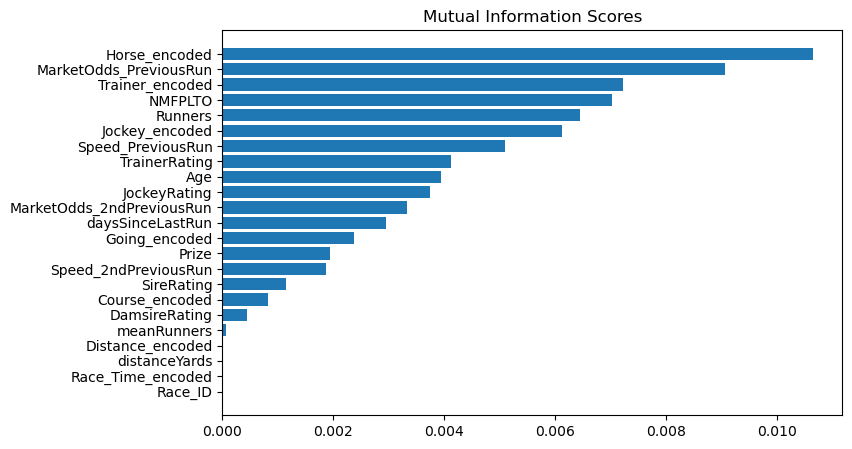

In [23]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## AutoFeat

In [25]:
from autofeat import AutoFeatRegressor
X_for_autofeat = X_for_mi.drop(['Horse_encoded', 'Jockey_encoded', 'Trainer_encoded', 'Race_ID', 'Race_Time_encoded'], axis=1)

model = AutoFeatRegressor(verbose=0, feateng_steps=2)
#X_autofeat = model.fit_transform(X_for_autofeat, y_for_mi)

In [26]:
#mi_scores_transform = make_mi_scores(X_autofeat, y)
#mi_scores_transform

## Feature Engineering

In [28]:
def make_features(df: pd.DataFrame) -> pd.DataFrame:
    X = df.copy()
    ### RELATIVE FEATURES ###
    X['relative_Age'] = X.groupby('Race_ID')['Age'].transform(lambda x: x - x.mean())
    X['relative_Speed_LTO'] = X.groupby('Race_ID')['Speed_PreviousRun'].transform(lambda x: x - x.mean())
    X['jockey_percentile'] = X.groupby('Race_ID')['JockeyRating'].rank(pct=True)
    X['trainer_percentile'] = X.groupby('Race_ID')['TrainerRating'].rank(pct=True)
    X['is_top_jockey'] = X.groupby('Race_ID')['JockeyRating'].transform(lambda x: x == x.max()).astype(int)
    
    X['trainer_jockey_strength'] = X['TrainerRating'] * df['JockeyRating']
    X['prize_per_runner'] = X['Prize'] / X['Runners']
    
    X['avg_speed_last2'] = X[['Speed_PreviousRun', 'Speed_2ndPreviousRun']].mean(axis=1)
    X['days_since_race_bin'] = pd.cut(X['daysSinceLastRun'], bins=[0,14,30,90,365], labels=False)

    X['delta_market_odds'] = X['MarketOdds_PreviousRun'] - X['MarketOdds_2ndPreviousRun']
    X['pct_change_market_odds'] = (
    (X['MarketOdds_PreviousRun'] - X['MarketOdds_2ndPreviousRun']) / X['MarketOdds_2ndPreviousRun']
    )
    X['delta_speed'] = X['Speed_PreviousRun'] - X['Speed_2ndPreviousRun']
    X['adjusted_speed_trend'] = X['delta_speed'] / (X['daysSinceLastRun'] + 1)

    
    ### DATE/TIME FEATURES ###
    X['Race_Time_Parsed'] = pd.to_datetime(X['Race_Time'], dayfirst=True, errors='coerce')
    X['Hour'] = X['Race_Time_Parsed'].dt.hour
    X['Month'] = X['Race_Time_Parsed'].dt.month

    def map_time_of_day(hour):
        if pd.isna(hour):
            return 'Unknown'
        elif hour < 12:
            return 'Morning'
        elif hour < 17:
            return 'Afternoon'
        elif hour < 21:
            return 'Evening'
        else:
            return 'Night'

    def map_season(month):
        if pd.isna(month):
            return 'Unknown'
        elif month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'

    X['Season'] = X['Month'].apply(map_season)
    X['TimeOfDay'] = X['Hour'].apply(map_time_of_day)
    
    
    return X

In [29]:
X_train = make_features(X)
y_train = y

X_train

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,relative_Age,relative_Speed_LTO,jockey_percentile,trainer_percentile,is_top_jockey,trainer_jockey_strength,prize_per_runner,avg_speed_last2,days_since_race_bin,delta_market_odds,pct_change_market_odds,delta_speed,adjusted_speed_trend,Race_Time_Parsed,Hour,Month,Season,TimeOfDay
0,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0.000000,12.500000,0.666667,0.500000,0,6.953572,828.666667,72.5,0.0,7.43,2.063889,5.0,0.625000,2024-01-02 19:00:00,19,1,Winter,Evening
1,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,-2.000000,-0.500000,0.500000,0.666667,0,6.270252,828.666667,55.0,0.0,38.48,9.183771,14.0,1.000000,2024-01-02 19:00:00,19,1,Winter,Evening
2,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,-2.000000,-11.500000,0.833333,1.000000,0,8.263235,828.666667,55.0,2.0,54.30,0.625360,-8.0,-0.156863,2024-01-02 19:00:00,19,1,Winter,Evening
3,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00,3.000000,2.500000,0.333333,0.333333,0,5.874153,828.666667,69.0,2.0,-3.89,-0.302488,-8.0,-0.205128,2024-01-02 19:00:00,19,1,Winter,Evening
4,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00,4.000000,-3.500000,0.166667,0.166667,0,5.612585,828.666667,60.5,1.0,26.64,1.463736,-3.0,-0.120000,2024-01-02 19:00:00,19,1,Winter,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,31/12/2024 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Fullforward,Michael Madgwick,William Carson,11,4,56.0,43.0,0.833333,9.04,13.23,2.968319,2.767347,57.0,2.718093,0.480990,8.75,-0.818182,-1.454545,0.818182,0.727273,0,8.214368,428.272727,49.5,2.0,-4.19,-0.316704,13.0,0.224138,2024-12-31 15:22:00,15,12,Winter,Afternoon
52095,31/12/2024 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Pablo Prince,Karen Jewell,Luke Morris,11,6,45.0,55.0,0.500000,48.38,5.09,3.233067,2.457842,40.0,3.019927,0.449697,11.50,1.181818,-12.454545,0.363636,0.909091,0,7.946367,428.272727,50.0,2.0,43.29,8.504912,-10.0,-0.243902,2024-12-31 15:22:00,15,12,Winter,Afternoon
52096,31/12/2024 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Paradoxical,Jennie Candlish,George Wood,11,3,71.0,58.0,0.800000,6.03,7.12,2.554826,2.555626,5.0,2.584142,0.450076,10.50,-1.818182,13.545455,0.454545,0.454545,0,6.529180,428.272727,64.5,0.0,-1.09,-0.153090,13.0,2.166667,2024-12-31 15:22:00,15,12,Winter,Afternoon
52097,31/12/2024 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Keen Interest,Alice Haynes,Kieran O'Neill,11,3,53.0,51.0,0.400000,26.57,22.16,2.443137,2.917672,15.0,2.632082,0.456602,10.75,-1.818182,-4.454545,0.909091,0.181818,0,7.128275,428.272727,52.0,1.0,4.41,0.199007,2.0,0.125000,2024-12-31 15:22:00,15,12,Winter,Afternoon


In [30]:
object_cols = [col for col in X_train.columns if X_train[col].dtype in ['object', 'datetime64[ns]']]
X_train.drop(columns=object_cols, inplace=True)

In [31]:
mi = mutual_info_classif(X_train.fillna(0), y_train, discrete_features='auto')
mi_scores = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
print(mi_scores)

MarketOdds_PreviousRun       0.008919
relative_Speed_LTO           0.006900
delta_market_odds            0.006012
Runners                      0.005804
NMFPLTO                      0.005386
Speed_PreviousRun            0.005258
jockey_percentile            0.005000
JockeyRating                 0.004600
MarketOdds_2ndPreviousRun    0.004414
days_since_race_bin          0.004193
TrainerRating                0.004122
trainer_percentile           0.003525
Speed_2ndPreviousRun         0.002987
trainer_jockey_strength      0.002721
avg_speed_last2              0.002398
Month                        0.002197
SireRating                   0.001132
Age                          0.000905
meanRunners                  0.000693
Hour                         0.000607
daysSinceLastRun             0.000593
delta_speed                  0.000514
is_top_jockey                0.000442
DamsireRating                0.000437
adjusted_speed_trend         0.000239
relative_Age                 0.000231
distanceYard

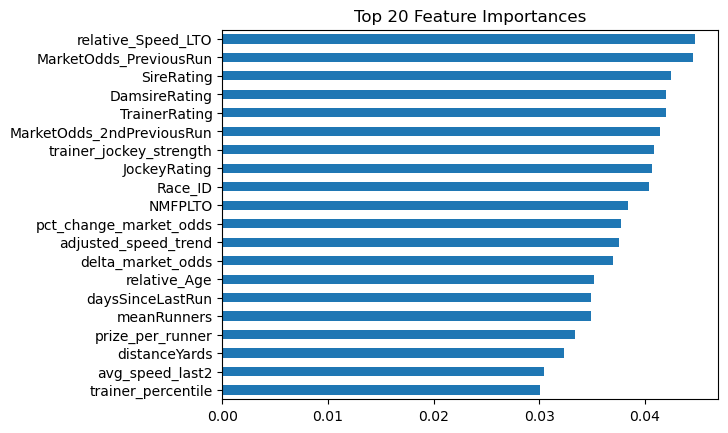

In [32]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values().tail(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.show()

## Pipelines

In [34]:
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, brier_score_loss
#import ace_tools as tools

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV

In [50]:
y_true = (df_full['Position'] == 1).astype(int)
race_ids = df_full['Race_ID']

df = make_features(df_full)
df.drop(columns=['betfairSP', 'Position', 'timeSecs', 'pdsBeaten', 'NMFP', 'Race_Time_Parsed'])
df_clean = df_clean.dropna()

columns_to_drop = ['Hour', 'Month', 'Horse', 'Trainer', 'Jockey', 'daysSinceLastRun', 'MarketOdds_PreviousRun',
       'MarketOdds_2ndPreviousRun', ]
object_features = []
for col in df.columns:
    if df[col].dtype in ['object']:
        if col not in columns_to_drop:
            object_features.append(col)
numerical_features = [col for col in df.columns if df[col].dtype in ['int32', 'float64'] and col not in columns_to_drop]
features = object_features + numerical_features

X = df[features]

In [51]:
df.columns

Index(['Race_Time', 'Race_ID', 'Course', 'Distance', 'distanceYards', 'Prize',
       'Going', 'Horse', 'Trainer', 'Jockey', 'betfairSP', 'Position',
       'timeSecs', 'pdsBeaten', 'NMFP', 'Runners', 'Age', 'Speed_PreviousRun',
       'Speed_2ndPreviousRun', 'NMFPLTO', 'MarketOdds_PreviousRun',
       'MarketOdds_2ndPreviousRun', 'TrainerRating', 'JockeyRating',
       'daysSinceLastRun', 'SireRating', 'DamsireRating', 'meanRunners',
       'relative_Age', 'relative_Speed_LTO', 'jockey_percentile',
       'trainer_percentile', 'is_top_jockey', 'trainer_jockey_strength',
       'prize_per_runner', 'avg_speed_last2', 'days_since_race_bin',
       'delta_market_odds', 'pct_change_market_odds', 'delta_speed',
       'adjusted_speed_trend', 'Race_Time_Parsed', 'Hour', 'Month', 'Season',
       'TimeOfDay'],
      dtype='object')

In [52]:
print(numerical_features)

['betfairSP', 'timeSecs', 'pdsBeaten', 'NMFP', 'Speed_PreviousRun', 'Speed_2ndPreviousRun', 'NMFPLTO', 'TrainerRating', 'JockeyRating', 'SireRating', 'DamsireRating', 'meanRunners', 'relative_Age', 'relative_Speed_LTO', 'jockey_percentile', 'trainer_percentile', 'trainer_jockey_strength', 'prize_per_runner', 'avg_speed_last2', 'days_since_race_bin', 'delta_market_odds', 'pct_change_market_odds', 'delta_speed', 'adjusted_speed_trend']


In [53]:
X_train, X_test, y_train, y_test, race_ids_train, race_ids_test = train_test_split(
    X, y_true, race_ids, test_size=0.2, stratify=race_ids, random_state=42
)

In [54]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, object_features)
])

In [55]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
}

In [56]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs'],
        'classifier__max_iter': [500, 1000, 2000]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [3, 6, 10]
    }
}

In [57]:
tuned_results = []

In [59]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[name],
        n_iter=10,
        cv=3,
        verbose=0,
        scoring='neg_log_loss',
        random_state=42,
        n_jobs=-1,
    )
    search.fit(X_train, y_train)

    # Best model from CV
    best_pipeline = search.best_estimator_
    best_proba = best_pipeline.predict_proba(X_test)[:, 1]

    # Normalize per race
    result_df = pd.DataFrame({
        'Race_ID': race_ids_test.values,
        'Predicted_Probability': best_proba,
        'True_Label': y_test.values
    })
    result_df['Normalized_Probability'] = result_df.groupby('Race_ID')['Predicted_Probability'].transform(lambda x: x / x.sum())
    result_df = result_df.dropna(subset=['Normalized_Probability'])

    # Evaluate
    logloss = log_loss(result_df['True_Label'], result_df['Normalized_Probability'])
    brier = brier_score_loss(result_df['True_Label'], result_df['Normalized_Probability'])

    tuned_results.append({
        'Model': f"{name} (Tuned)",
        'Log Loss': logloss,
        'Brier Score': brier
    })


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_c

In [67]:
tuned_results_df = pd.DataFrame(tuned_results)

In [68]:
tuned_results_df

,Model,Log Loss,Brier Score
0,Logistic Regression (Tuned),12.699140,0.412246
1,Random Forest (Tuned),4.236812,0.278089
2,XGBoost (Tuned),2.135628,0.270668
